![This is an image](Quant-Trading.jpg)

In [1]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

In [2]:
#IMPORT EQUITY PRICES
df = pd.read_csv('SPX.csv',encoding='UTF-8')   #IN THIS EXAMPLE WE USE SPX

In [3]:
#CALCULATIONS USING LAMBDA FUNCTION - MUCH FASTER
stop = 0.1220

NEW_HIGH = df['Close'].iloc[0]
NEW_LOW = df['Close'].iloc[0]
PREVIOUS_SIGNAL = 1.0
SIGNAL = PREVIOUS_SIGNAL

def calculations(SIGNAL,CLOSE):
    global NEW_HIGH
    global NEW_LOW
    global PREVIOUS_SIGNAL
    
    #COMPUTE SIGNAL, NEW_HIGH, NEW_LOW
    if PREVIOUS_SIGNAL == 1.0:
        if CLOSE < NEW_HIGH*(1-stop):            
            SIGNAL = -1.0            
            PREVIOUS_SIGNAL = 1.0
        else:            
            SIGNAL = 1.0
            PREVIOUS_SIGNAL = 1.0
    else:
        if CLOSE > NEW_LOW*(1+stop):            
            SIGNAL = 1.0
            PREVIOUS_SIGNAL = -1.0
        else:            
            SIGNAL = -1.0 
            PREVIOUS_SIGNAL = -1.0
            
    if SIGNAL!= PREVIOUS_SIGNAL:
        NEW_HIGH = CLOSE
        NEW_LOW = CLOSE
        PREVIOUS_SIGNAL = -1.0*PREVIOUS_SIGNAL
    else:
        if SIGNAL == 1.0:
            NEW_HIGH = np.maximum(NEW_HIGH,CLOSE)            
        else:
            NEW_LOW = np.minimum(NEW_LOW,CLOSE)           
            
    
    return SIGNAL, NEW_HIGH, NEW_LOW

In [4]:
#IN SAMPLE DATAFRAME AND WEIGHTING SCHEME

df_is = df.iloc[0:7000]
df_is['daily_return_mkt'] = df_is['Close'][1:].values/ df_is['Close'][:-1]-1
df_is['daily_return_mkt'] = df_is['daily_return_mkt'].shift(-1)
df_is['cumulative_return_mkt']=(1 + df_is['daily_return_mkt']).cumprod() - 1
df_is['cumulative_return_mkt'][1:]=df_is['cumulative_return_mkt'][:-1]    

stop_loss = [0.05,0.075,0.10,0.125,0.15,0.175]

i = 0

for stop in stop_loss:
    
    results = df_is.apply(lambda row: calculations(SIGNAL, CLOSE=row['Close']),axis=1)
    df_is['signal'+ str(i)] = [x[0] for x in results]
    i = i + 1
    
weights = [0.0,0.0,1.0,0.0,0.0,0.0]

df_is['Total_signal'] = (weights[0]*df_is['signal0'] + 
                         weights[1]*df_is['signal1'] +
                         weights[2]*df_is['signal2'] +
                         weights[3]*df_is['signal3'] +
                         weights[4]*df_is['signal4'] +
                         weights[5]*df_is['signal5'] )


df_is['daily_return_signal'] = df_is['daily_return_mkt']*df_is['Total_signal']
df_is['cumulative_return_signal']=(1 + df_is['daily_return_signal']).cumprod() - 1
df_is['cumulative_return_signal'][1:]=df_is['cumulative_return_signal'][:-1]

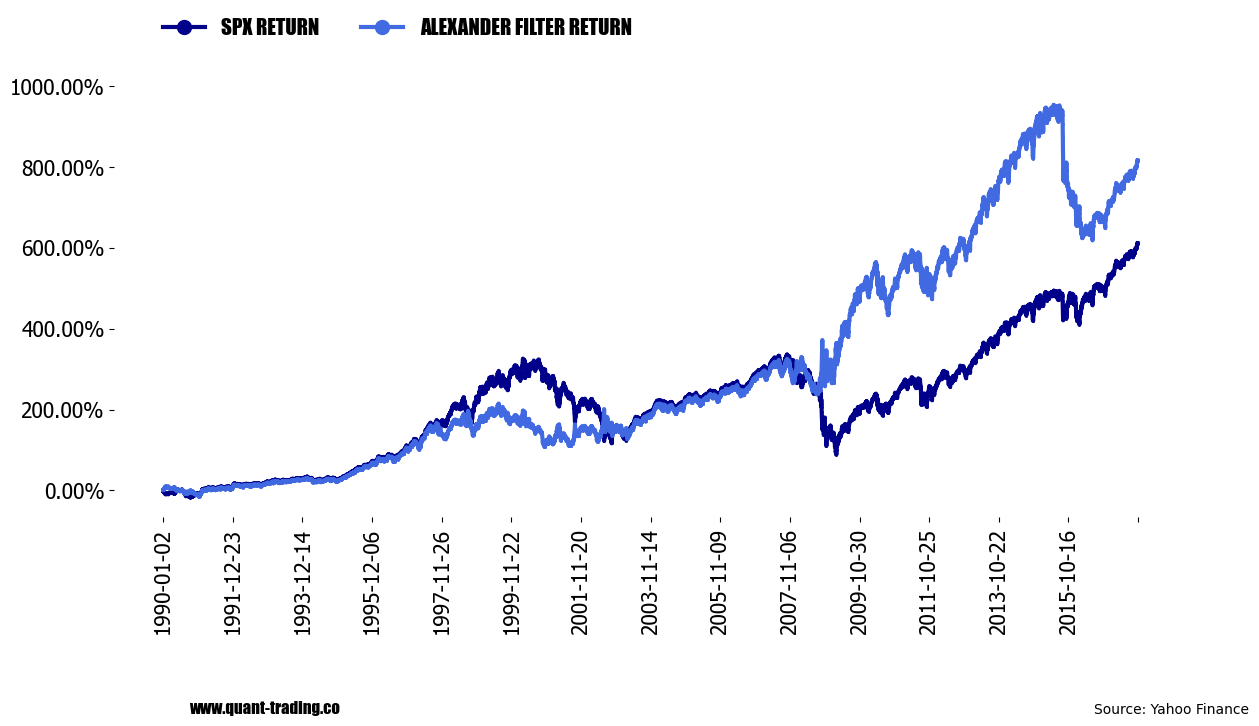

In [5]:
#------------------------CHART - SPX RETURNS VS ALEXANDER'S FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 500

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_is['Date'],df_is['cumulative_return_mkt']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SPX RETURN',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal']*100,marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='ALEXANDER FILTER RETURN',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df['Date'].iloc[-1500], -550,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(df['Date'].iloc[-8000], -550,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

In [6]:
#FUNCTION DEFINITION FOR PARAMETER'S OPTIMIZATION

def function1(parameters):
    
    
    stop = 0.1220

    NEW_HIGH = df['Close'].iloc[0]
    NEW_LOW = df['Close'].iloc[0]
    PREVIOUS_SIGNAL = 1.0
    SIGNAL = PREVIOUS_SIGNAL

    def calculations(SIGNAL,CLOSE):
        global NEW_HIGH
        global NEW_LOW
        global PREVIOUS_SIGNAL

        #COMPUTE SIGNAL, NEW_HIGH, NEW_LOW
        if PREVIOUS_SIGNAL == 1.0:
            if CLOSE < NEW_HIGH*(1-stop):            
                SIGNAL = -1.0            
                PREVIOUS_SIGNAL = 1.0
            else:            
                SIGNAL = 1.0
                PREVIOUS_SIGNAL = 1.0
        else:
            if CLOSE > NEW_LOW*(1+stop):            
                SIGNAL = 1.0
                PREVIOUS_SIGNAL = -1.0
            else:            
                SIGNAL = -1.0 
                PREVIOUS_SIGNAL = -1.0

        if SIGNAL!= PREVIOUS_SIGNAL:
            NEW_HIGH = CLOSE
            NEW_LOW = CLOSE
            PREVIOUS_SIGNAL = -1.0*PREVIOUS_SIGNAL
        else:
            if SIGNAL == 1.0:
                NEW_HIGH = np.maximum(NEW_HIGH,CLOSE)            
            else:
                NEW_LOW = np.minimum(NEW_LOW,CLOSE)           


        return SIGNAL, NEW_HIGH, NEW_LOW
    
    
    df_is = df.iloc[0:7500]
    df_is['daily_return_mkt'] = df_is['Close'][1:].values/ df_is['Close'][:-1]-1
    df_is['daily_return_mkt'] = df_is['daily_return_mkt'].shift(-1)
    df_is['cumulative_return_mkt']=(1 + df_is['daily_return_mkt']).cumprod() - 1
    df_is['cumulative_return_mkt'][1:]=df_is['cumulative_return_mkt'][:-1]  
    
   
    stop_loss = [0.095,0.0975,0.10,0.1025,0.105,0.11]

    i = 0
    
    for stop in stop_loss: 
        
        NEW_HIGH = df_is['Close'].iloc[0]
        NEW_LOW = df_is['Close'].iloc[0]
        PREVIOUS_SIGNAL = 1
        SIGNAL = PREVIOUS_SIGNAL
        
        results = df_is.apply(lambda row: calculations(SIGNAL, CLOSE=row['Close']),axis=1)
        df_is['signal'+ str(i)] = [x[0] for x in results]
        i = i + 1        
        


    df_is['Total_signal'] = (parameters[0]*df_is['signal0'] + 
                             parameters[1]*df_is['signal1'] +
                             parameters[2]*df_is['signal2'] +
                             parameters[3]*df_is['signal3'] +
                             parameters[4]*df_is['signal4'] +
                             parameters[5]*df_is['signal5'] )
    
    df_is['daily_return_signal'] = df_is['daily_return_mkt']*df_is['Total_signal']
    df_is['cumulative_return_signal']=(1 + df_is['daily_return_signal']).cumprod() - 1
    df_is['cumulative_return_signal'][1:]=df_is['cumulative_return_signal'][:-1]
    
    
    return -df_is['cumulative_return_signal'].iloc[-2]
    
function1([0.0,0.0,1.0,0.0,0.0,0.0])

-8.359242984584721

In [7]:
#OPTIMIZATION

from scipy.optimize import minimize

weights = [0.25,0.25,0.25,0.25,0.0,0.0]
bounds=[[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0.0,1.0]]
opt_constraints = ({'type': 'eq',
                        'fun': lambda weights: 1.0 - np.sum(weights)}
                   )

optimal_weights = minimize(function1, 
                           weights,                                
                            method='SLSQP',
                            bounds=bounds,
                            constraints=opt_constraints)


print(optimal_weights)

     fun: -8.824483811698919
     jac: array([-14.8851577 , -15.72936749, -17.95981431, -17.95953262,
       -15.35405624, -15.1649673 ])
 message: 'Optimization terminated successfully'
    nfev: 28
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([6.23244012e-14, 5.89954177e-14, 3.31299297e-02, 9.66870070e-01,
       3.21073620e-14, 3.55767805e-14])


In [8]:
#FUNCTION EVALUATION

function1([0.0, 0.0, 0.033, 0.967, 0.0, 0.0])

-8.824483765995833

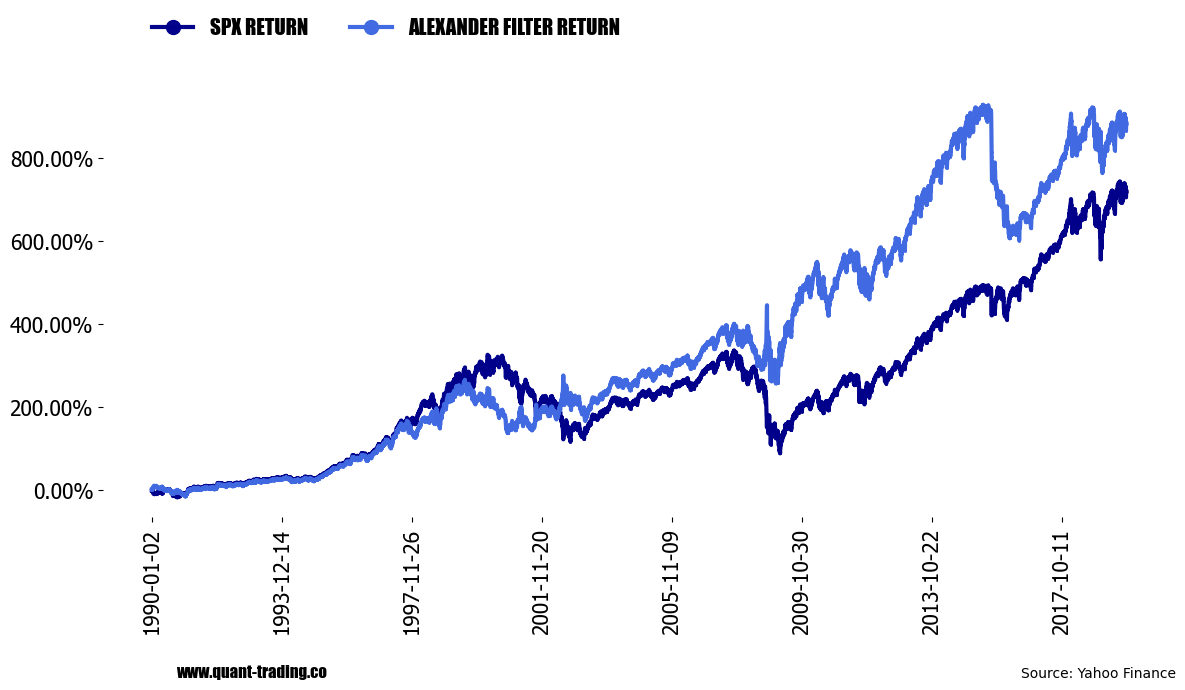

In [9]:
#OPTIMIZED WEIGHTS

df_is = df.iloc[0:7500]
df_is['daily_return_mkt'] = df_is['Close'][1:].values/ df_is['Close'][:-1]-1
df_is['daily_return_mkt'] = df_is['daily_return_mkt'].shift(-1)
df_is['cumulative_return_mkt']=(1 + df_is['daily_return_mkt']).cumprod() - 1
df_is['cumulative_return_mkt'][1:]=df_is['cumulative_return_mkt'][:-1]    

stop_loss = [0.095,0.0975,0.10,0.1025,0.105,0.11]

i = 0

for stop in stop_loss:    
       
    results = df_is.apply(lambda row: calculations(SIGNAL, CLOSE=row['Close']),axis=1)
    df_is['signal'+ str(i)] = [x[0] for x in results]
    i = i + 1
    
    
weights = [0.0, 0.0, 0.033, 0.967, 0.0, 0.0]


df_is['Total_signal'] = (weights[0]*df_is['signal0'] + 
                         weights[1]*df_is['signal1'] +
                         weights[2]*df_is['signal2'] +
                         weights[3]*df_is['signal3'] +
                         weights[4]*df_is['signal4'] +
                         weights[5]*df_is['signal5'] )


df_is['daily_return_signal'] = df_is['daily_return_mkt']*df_is['Total_signal']
df_is['cumulative_return_signal']=(1 + df_is['daily_return_signal']).cumprod() - 1
df_is['cumulative_return_signal'][1:]=df_is['cumulative_return_signal'][:-1]


#------------------------CHART - SPX RETURNS VS ALEXANDER FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 1000

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_is['Date'],df_is['cumulative_return_mkt']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SPX RETURN',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal']*100,marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='ALEXANDER FILTER RETURN',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df['Date'].iloc[-1500], -450,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(df['Date'].iloc[-8000], -450,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

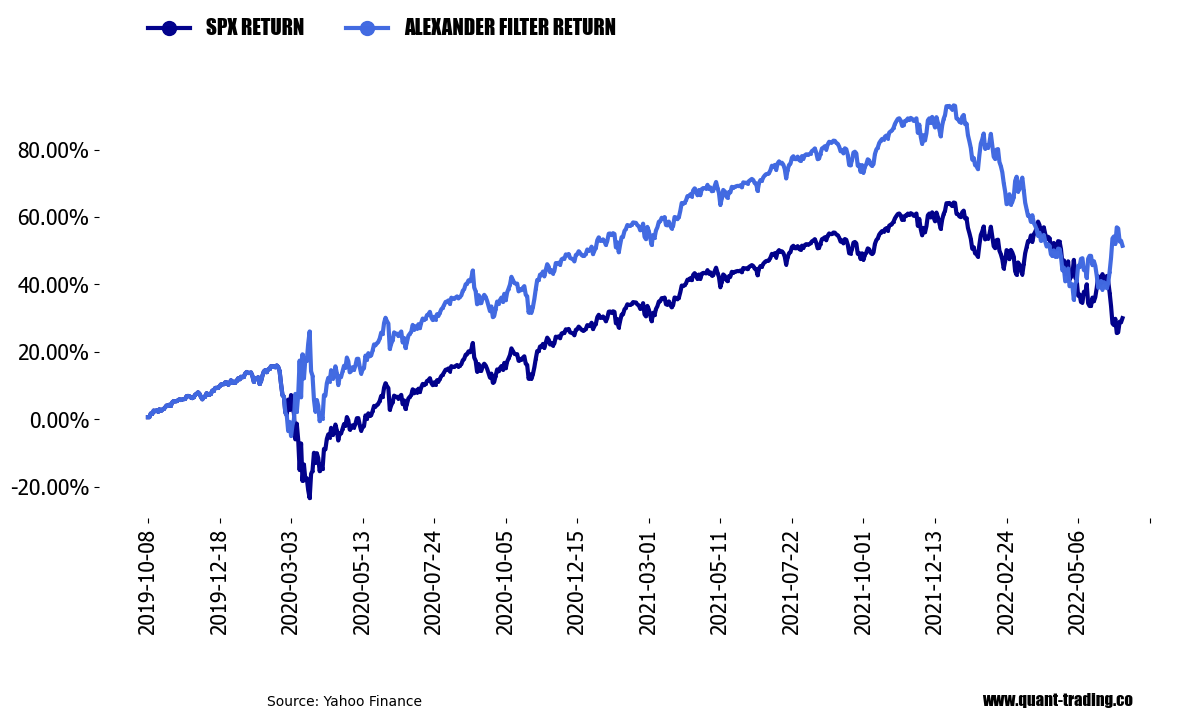

In [10]:
#OUT OF SAMPLE DATAFRAME

df_os = df.iloc[7500:8183]

NEW_HIGH = df_os['Close'].iloc[0]
NEW_LOW = df_os['Close'].iloc[0]
PREVIOUS_SIGNAL = 1
SIGNAL = PREVIOUS_SIGNAL

stop_loss = [0.095,0.0975,0.10,0.1025,0.105,0.11]
i = 0

for stop in stop_loss:   
       
    results = df_os.apply(lambda row: calculations(SIGNAL, CLOSE=row['Close']),axis=1)
    df_os['signal'+ str(i)] = [x[0] for x in results]
    i = i + 1
    
    NEW_HIGH = df_os['Close'].iloc[0]
    NEW_LOW = df_os['Close'].iloc[0]
    PREVIOUS_SIGNAL = 1
    SIGNAL = PREVIOUS_SIGNAL
    
     
weights = [0.0, 0.0, 0.033, 0.967, 0.0, 0.0]

df_os['Total_signal'] = (weights[0]*df_os['signal0'] + 
                         weights[1]*df_os['signal1'] +
                         weights[2]*df_os['signal2'] +
                         weights[3]*df_os['signal3'] +
                         weights[4]*df_os['signal4'] +
                         weights[5]*df_os['signal5'] )


df_os['daily_return_mkt'] = df_os['Close'][1:].values/ df_os['Close'][:-1]-1
df_os['daily_return_mkt'] = df_os['daily_return_mkt'].shift(-1)
df_os['daily_return_signal'] = df_os['daily_return_mkt']*df_os['Total_signal']

df_os['cumulative_return_mkt']=(1 + df_os['daily_return_mkt']).cumprod() - 1
df_os['cumulative_return_mkt'][1:]=df_os['cumulative_return_mkt'][:-1] 
df_os['cumulative_return_signal']=(1 + df_os['daily_return_signal']).cumprod() - 1
df_os['cumulative_return_signal'][1:]=df_os['cumulative_return_signal'][:-1]

#------------------------CHART - SPX RETURNS VS ALEXANDER FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 50

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_os['Date'],df_os['cumulative_return_mkt']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SPX RETURN',markersize=1)
ax1.plot(df_os['Date'],df_os['cumulative_return_signal']*100,marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='ALEXANDER FILTER RETURN',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df_os['Date'].iloc[-600], -85,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(df_os['Date'].iloc[-100], -85,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()
